# Imports e Dependências

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataset

In [46]:
df = pd.read_csv('./dataset/movie_dataset_silver.csv')
df = df.drop(columns=["Unnamed: 0"])
df.head()

,adult,budget,id,origin_country,original_language,original_title,overview,popularity,release_date,revenue,...,status,tagline,title,video,vote_average,vote_count,ingestion_date,genre,company,country
0,False,0,1151470,['US'],en,The Vigilante,"Returning from Afghanistan, Jessica, a Spec OP...",1718.486125,2023-09-08,0,...,Released,She will find you.,The Vigilante,False,5.850,20,2025-03-24,Thriller,Shattered Images Films,United States of America
1,False,0,1125899,['GB'],en,Cleaner,When a group of radical activists take over an...,1510.943375,2025-02-19,0,...,Released,The stakes are a thousand feet high.,Cleaner,False,5.800,46,2025-03-24,Action,Anton,United Kingdom
2,False,0,1301650,['MN'],mn,Z Zone,"In a remote corner of the world, a group of tr...",1296.425625,2025-02-07,0,...,Released,NaN,Z Zone,False,7.600,9,2025-03-24,Horror,NaN,Mongolia
3,False,270000000,447273,['US'],en,Snow White,Princess Snow White flees the castle when the ...,1114.221625,2025-03-19,87000000,...,Released,The classic tale comes to life.,Snow White,False,4.664,256,2025-03-24,Family,Walt Disney Pictures,United States of America
4,False,180000000,822119,['US'],en,Captain America: Brave New World,After meeting with newly elected U.S. Presiden...,1794.803500,2025-02-12,400056272,...,Released,The future favors the brave.,Captain America: Brave New World,False,6.100,1090,2025-03-24,Action,Marvel Studios,United States of America


In [47]:
df_rl = pd.DataFrame()
df_rl['X'] = df['budget']
df_rl['Y'] = df['revenue'] 
df_rl.head()

,X,Y
0,0,0
1,0,0
2,0,0
3,270000000,87000000
4,180000000,400056272


# Regressão Linear

### Cálculo de média

In [48]:
avg_x = np.average(df_rl['X'])
print('Média do X:', avg_x)

avg_y = np.average(df_rl['Y'])
print('Média do Y:', avg_y)

Média do X: 62039105.29
Média do Y: 287824472.3983333


### Cálculo de Variância

In [49]:
x_data = []

for i in df_rl['X']:
    x_value = np.power((i-avg_x),2)
    x_data.append(x_value)

var_x = sum(x_data) / len(x_data)

print('Variância do X:', var_x)

Variância do X: 6765177063289437.0


In [50]:
y_data = []

for i in df_rl['Y']:
    y_value = np.power((i-avg_y), 2)
    y_data.append(y_value)

var_y = sum(y_data) / len(y_data)

print('Variância do Y:', var_y)

Variância do Y: 1.8545331883806387e+17


### Cálculo de covariância

In [51]:
x_data = np.zeros(len(df_rl['X']))

for j,i in enumerate(df_rl['X']):
    x_value = i-avg_x
    x_data[j] = x_value

y_data = np.zeros(len(df_rl['Y']))

for j,i in enumerate(df_rl['Y']):
    y_value = i-avg_y
    y_data[j] = y_value

cov = (sum(x_data * y_data)) / (len(x_data))

print('Covariância entre X e Y:', cov)

Covariância entre X e Y: 2.6785859642609812e+16


### Estimativa de coeficientes

In [52]:
b1 = cov / var_x
print('Coeficiente Angular:', b1)

b0 = avg_y - (b1 * avg_x)
print('Intercepto:', b0)

Coeficiente Angular: 3.959373035180502
Intercepto: 42188511.78638327


### Previsões

In [53]:
prv = b0 + (b1 * df_rl['X'])
print(prv)

0      4.218851e+07
1      4.218851e+07
2      4.218851e+07
3      1.111219e+09
4      7.548757e+08
           ...     
595    4.218851e+07
596    5.367069e+07
597    1.609697e+08
598    1.032032e+09
599    6.000569e+07
Name: X, Length: 600, dtype: float64


# Visualização Gráfica

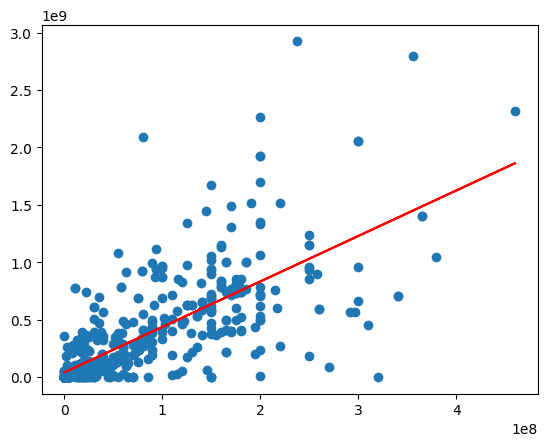

In [54]:
reg = plt.scatter(df_rl['X'], df_rl['Y'], label='Dados reais')

plt.plot(df_rl['X'], prv, color='red', label='Linha de previsão')